<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-1">Random Forest Regression</a></span><ul class="toc-item"><li><span><a href="#Wstęp" data-toc-modified-id="Wstęp-1.1">Wstęp</a></span></li><li><span><a href="#Teraz-czas-na-Ciebie-:)" data-toc-modified-id="Teraz-czas-na-Ciebie-:)-1.2">Praca domowa nr 13</a></span>

# Random Forest Regression

In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Wstęp

Na zajęciach skupialiśmy się na przykładach klasyfikacji. Korzystalimy z klasy **sklearn.ensemble.RandomForestClassifier**.

Przeprowadź rozumowanie dla problemu regresji. Użyj w tym celu omawianego **sklearn.ensemble.RandomForestRegressor**.

* Wczytaj zaproponowany zbiór danych dotyczący cen mieszkań w Bostonie. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

I spróbuj przewidzieć ceny mieszkań na podstawie dostępnych zmiennych.

In [2]:
boston = load_boston()
all_x, all_y = boston.data, boston.target

* Stwórz obiekt RandomForestRegressor z domyślnymi parametrami i dopasuj go do danych (metoda .fit()).

In [3]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(all_x, all_y)

RandomForestRegressor()

* Sprawdźmy wynik na zbiorze uczącym używając metody .score().

Metoda ta zwraca domyślnie dla RandomForestRegressor wartość współczynnika determinacji R^2.

In [4]:
rf_regressor.score(all_x, all_y)

0.9841142644181312

* Możesz użyć metody .predict() żeby zwrócić predykcje. [:5] - ogranicza do pierwszych pięciu wyników

In [5]:
rf_regressor.predict(all_x[:5])

array([25.499, 22.153, 34.586, 34.089, 35.48 ])

## Praca domowa nr 13

Podziel zbiór na treningowy i testowy w proporcji 2:1 [10%]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(all_x,all_y,test_size=0.33)

Stwórz nowy Forest Regressor z domyślnymi parametrami i dopasuj go do zbioru treningowego [10%]

In [7]:
rf_regressor=RandomForestRegressor()
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

Narysuj jedno drzewo tworzące powyższy las losowy, użyj atrybutu .estimators_ oraz funkcji plot_tree [10%]

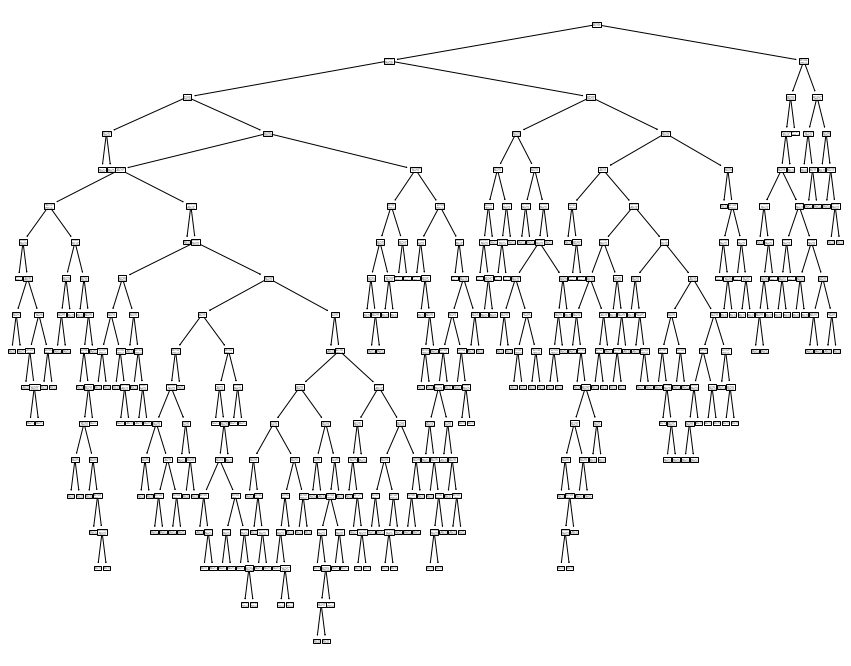

In [8]:
plt.figure(figsize = (15,12))
plot_tree(rf_regressor.estimators_[1], feature_names=boston.feature_names, class_names=boston.target);

Sprawdz score na danych testowych [10%]

In [9]:
rf_regressor.score(X_test,y_test)

0.8849830275600215

* Sprawdz jak zmienia się score gdy liczba estymatorów zmienia się od 1 do 100 (parametr n_estimators) [20%]

Narysuj wykres zależności wyniku od wartości parametru. Jakie masz wnioski?

In [10]:
rf_train_scores,  rf_test_scores = [], []
for i in range(1,100,1):
    rf_regres=RandomForestRegressor(n_estimators=i).fit(X_train,y_train)
    rf_train_scores.append(rf_regres.score(X_train,y_train))
    #rf_test_scores.append(rf_regres.score(X_test,y_test))

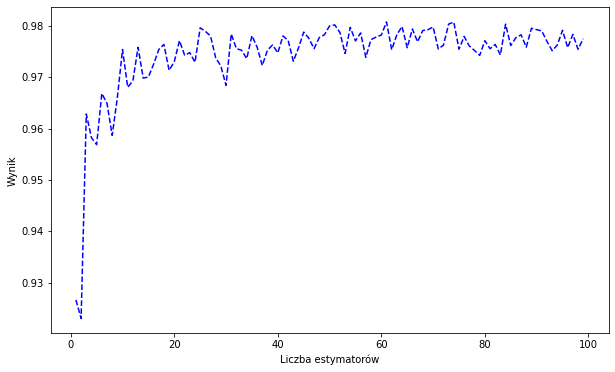

In [11]:
plt.figure(figsize=(10, 6))
plt.xlabel("Liczba estymatorów")
plt.ylabel("Wynik")
plt.plot(range(1, 100, 1), rf_train_scores, 'b--');
#plt.plot(range(1, 100, 1), rf_test_scores, 'm');

Im większa liczba estymatorów tym score utrzymuje się na poziomie między 0.96 a 0.98. W tym przypadku nie ma sensu zwiększać liczby estymatorów, ponieważ efekty będzie zbliżony niezależnie czy zostanie zasotosowane 20 czy 80 estyatorów.

* Dopasuj model Random Forest z 80 estymatorami (parametr n_estimators) [20%]

Narysuj jak współczynnik R^2 zmienia się ze zmianą parametru `max_leaf_nodes` dla zbioru treningowego i testowego.

Użyj zakresu wartości: `range(2, 500, 10)`

In [12]:
rf_train_scores,  rf_test_scores = [], []
for i in range(2, 500, 10):
    rf_regres=RandomForestRegressor(n_estimators=80, max_leaf_nodes=i).fit(X_train,y_train)
    rf_train_scores.append(rf_regres.score(X_train,y_train))
    rf_test_scores.append(rf_regres.score(X_test,y_test))

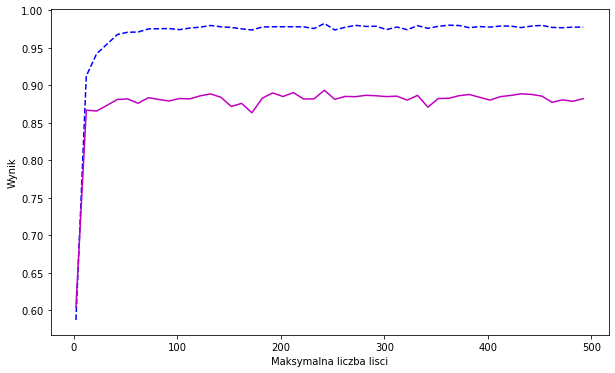

In [13]:
plt.figure(figsize=(10, 6))
plt.xlabel("Maksymalna liczba lisci")
plt.ylabel("Wynik")
plt.plot(range(2, 500, 10), rf_train_scores, 'b--')
plt.plot(range(2, 500, 10), rf_test_scores, 'm');

Wraz ze wzrostem liczby liści model coraz bardziej dopasowowywuje się do danych. 

* Dobierz wybrane parametry korzystając z dowolnej metody optymalizacji hiperparametrów. [20%]

Ustal zakresy dla zmiennych:

`n_estimators`

`max_leaf_nodes`

`min_samples_split`

`min_samples_leaf`

Użyj 5-krotnej crosswalidacji.

Użyj domyślnej wartości parametru `scoring`.

In [70]:
param_grid = {"max_leaf_nodes": [3, 5, 10, 12, None],
             "n_estimators":[10, 20, 50, 100],
             "min_samples_leaf":[3, 4, 5, 10, 20, 25],
             "min_samples_split":[ 2, 3, 4, 5, 6, 7, 8],
             }
rf_reg=RandomForestRegressor()
grid_search = GridSearchCV(rf_reg, param_grid=param_grid, cv=5, verbose=0)
grid_search.fit(X_train, y_train)
best_param_no = grid_search.best_index_ 
print('Best params set:', grid_search.best_params_, '(no. {0})'.format(best_param_no))
print('Best params score:', grid_search.best_score_ )

Best params set: {'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 20} (no. 677)
Best params score: 0.8187059942917525


## Zadania z gwiazdką

* Wytrenuj na zbiorze treningowym model RandomForrestRegressor z najlepszymi wybranymi parametrami. Sprawdź wynik na zbiorze testowym [dodatkowe 10%]

In [73]:
rf_regres_best=RandomForestRegressor(max_leaf_nodes= None, min_samples_leaf= 3, min_samples_split= 3, n_estimators= 20).fit(X_train,y_train)
rf_regres_best.score(X_train,y_train),rf_regres_best.score(X_test,y_test)

(0.9373721699332433, 0.8354731826312165)

- Spróbuj rozwiązać powyższy problem za pomocą innych znanych modeli. Porównaj wyniki - który model działa najlepiej? [20%]

In [50]:
###########################
### miejsce na Twoj kod ###
###########################